In [1]:
import os
os.environ["OMP_NUM_THREADS"]='1'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv(r'C:\Users\USER\Downloads\Iris.csv')

In [10]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
x=data.iloc[:,1:5].values

In [15]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

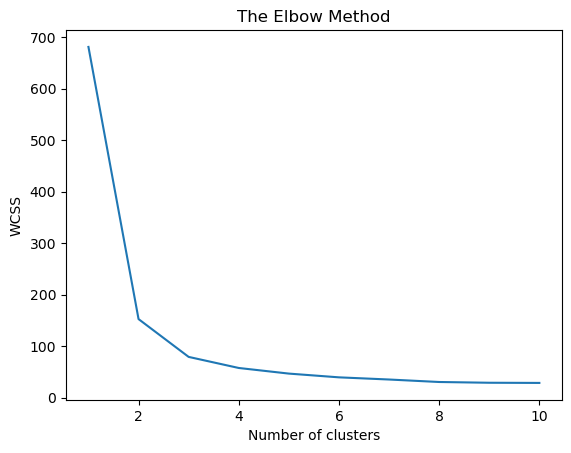

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94506582597728,
 57.44028021295475,
 46.535582051282034,
 39.251830892636775,
 35.04275995246584,
 30.217021122152712,
 28.7564561965812,
 28.424891802641817]

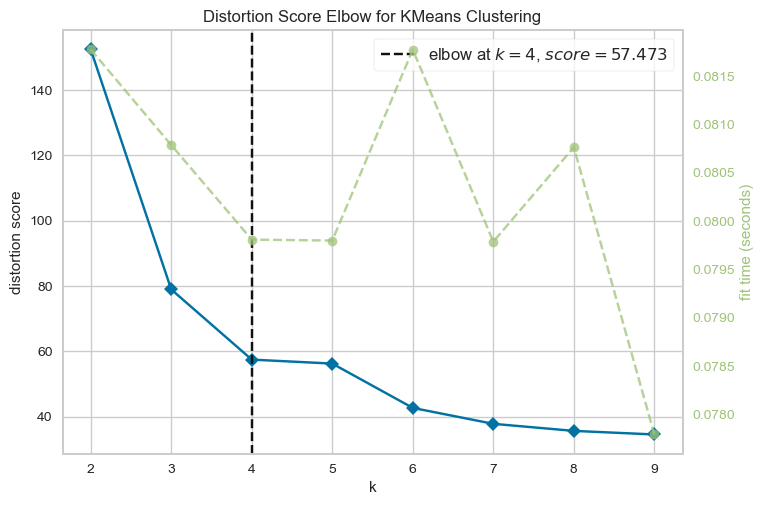

In [20]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(x)
visualizer.show()
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 3 , init ='k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

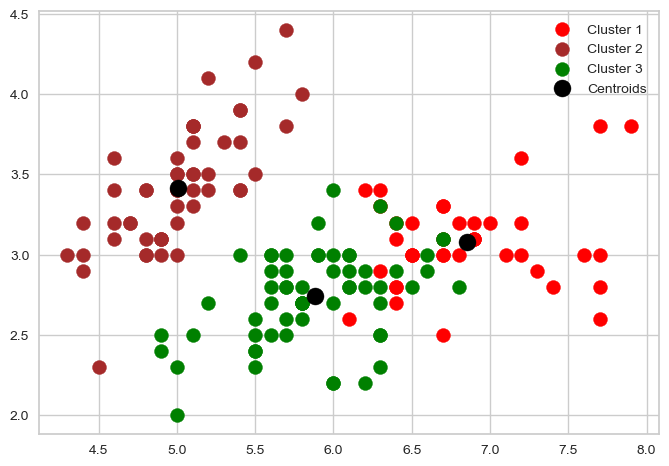

In [22]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'brown', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

In [23]:
x[y_kmeans == 0, 0]

array([7. , 6.9, 6.7, 6.3, 7.1, 6.3, 6.5, 7.6, 7.3, 6.7, 7.2, 6.5, 6.4,
       6.8, 6.4, 6.5, 7.7, 7.7, 6.9, 7.7, 6.7, 7.2, 6.4, 7.2, 7.4, 7.9,
       6.4, 6.1, 7.7, 6.3, 6.4, 6.9, 6.7, 6.9, 6.8, 6.7, 6.7, 6.5, 6.2])

In [24]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [25]:
dataset = pd.read_csv(r'C:\Users\USER\Downloads\Analysis.csv')

In [26]:
dataset.head()

,Unnamed: 0,Genotypes,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS
0,0,(Gulabi X B’lore Purple),0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,18.533333,0.566667,5.550000,60.966667,10.433333,32.933333,127.000000,4.203333,2.000000
1,1,Alden,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,18.656667,0.716667,8.446667,40.700000,14.156667,25.233333,116.666667,11.836667,2.000000
2,2,Aledo,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,18.090000,0.666667,5.560000,51.200000,15.776667,22.066667,141.666667,5.390000,2.333333
3,3,Amber Sweet,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,18.010000,0.553333,3.820000,38.233333,9.266667,10.953333,121.333333,4.030000,1.333333
4,4,Arka Chitra,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,16.943333,0.746667,2.793333,52.643333,17.633333,26.366667,127.333333,3.460000,1.666667


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             75 non-null     int64  
 1   Genotypes              75 non-null     object 
 2   PruningBiomass         75 non-null     float64
 3   TimeofBudbrust         75 non-null     float64
 4   Timeoffullbloom        75 non-null     float64
 5   Time of verasion       75 non-null     float64
 6   ABW                    75 non-null     float64
 7   BW                     75 non-null     float64
 8   BD                     75 non-null     float64
 9   BL                     75 non-null     float64
 10  TSS                    75 non-null     float64
 11  Acidity                75 non-null     float64
 12  Compaactness           75 non-null     float64
 13  Skinfirmness           75 non-null     float64
 14  Bunlen                 75 non-null     float64
 15  peduncle

In [28]:
y=dataset.iloc[:,2:-1].values

In [29]:
y

array([[  0.32766667,   9.        ,  38.33333333, ...,  32.93333333,
        127.        ,   4.20333333],
       [  2.13766667,  10.        ,  35.33333333, ...,  25.23333333,
        116.66666667,  11.83666667],
       [  0.91266667,  10.66666667,  39.66666667, ...,  22.06666667,
        141.66666667,   5.39      ],
       ...,
       [  0.51433333,  13.33333333,  32.66666667, ...,  16.2       ,
        136.33333333,   6.84666667],
       [  0.67      ,  11.        ,  31.        , ...,   6.66666667,
        126.33333333,   5.85      ],
       [  0.785     ,   9.        ,  31.33333333, ...,   8.        ,
        134.66666667,   6.99333333]])

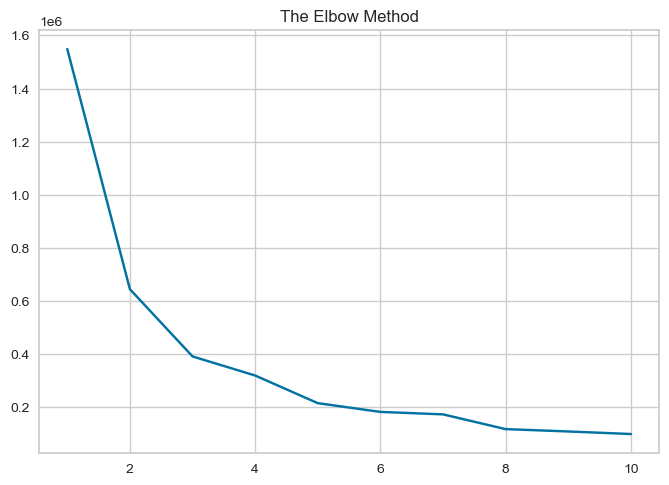

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.show()

In [31]:
wcss

[1548675.4988771027,
 644655.5921476273,
 391580.4167937157,
 319680.32662027597,
 215608.6035005136,
 182709.50350006868,
 173445.19744873256,
 117927.97518396788,
 109105.09104533044,
 99450.07277564259]

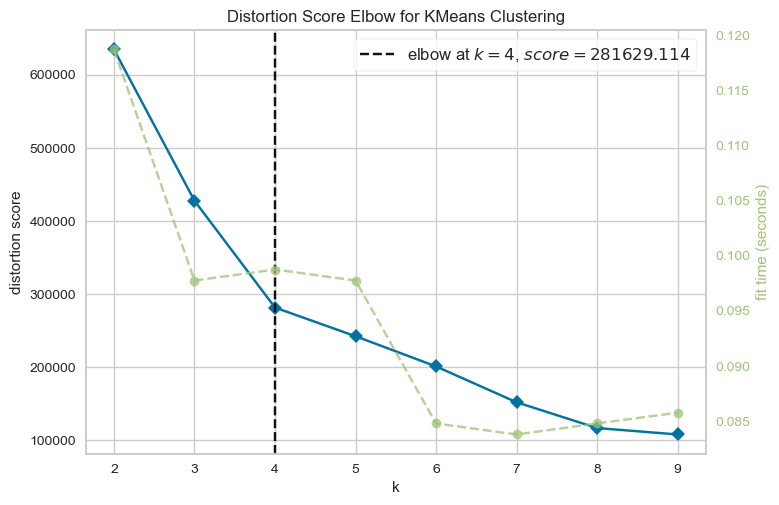

In [32]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(y)
visualizer.show()
plt.show()

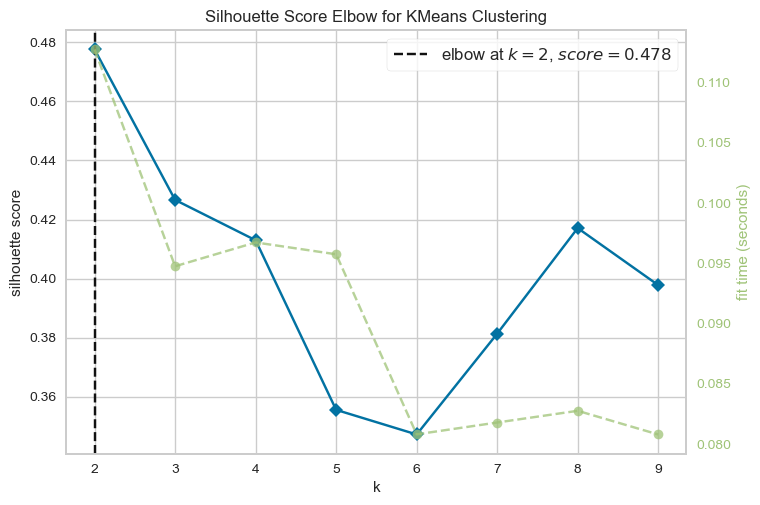

In [33]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(y)
visualizer.show()
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 2 , init ='k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(y)
y_kmeans

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0])

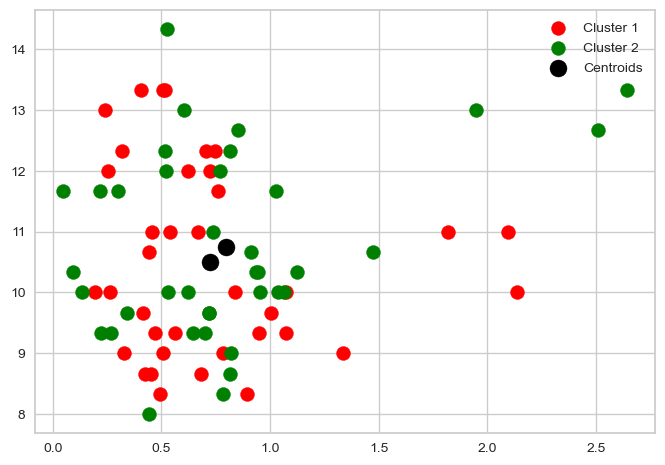

In [35]:
plt.scatter(y[y_kmeans == 0, 0], y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(y[y_kmeans == 1, 0], y[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.legend()
plt.show()